# week3 授業課題　信用情報の分析

## 【問題1】コンペティション内容の把握
コンペティションのOverviewページ読み、「Home Credit Default Risk」はどのようなコンペティションか、以下の観点からレポートしてください。

- Home Creditはどのような企業？
- このコンペティションでは何を予測する？
- それを予測することで企業が得られるメリットは何？

### 1-1
【回答】
雇用や中小企業から定期的に収入を得ているが、銀行や他の伝統的な貸し手からの資金調達にアクセスする可能性が低い、ブルーカラーとジュニアホワイトカラーのセグメントのサービスの行き届いていない借り手に、オンラインおよび物流ネットワークを通じて、POSローン、現金ローン、およびリボルビングローン商品をお客様に提供している会社

### 1-2
【回答】
お金を貸しても返済してくれそうか、してくれなさそうかを予測する

### 1-3
【回答】
返済能力があるにもかかわらず、お金を貸してもらえなかった人たちにお金を貸すことにより<br>
新たな顧客市場の開拓と、返済見込みの高い人を予測し貸付をすることでリスクを減らすことができる

## 【問題2】データの概観の把握
- .head()、.info()、describe()などを使う
- 欠損値の有無を見る
- クラスの割合がわかるグラフを描く


それぞれ結果に対する説明や考察も行ってください。

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

In [25]:
df = pd.read_csv("application_train.csv")

### 目的変数 TARGET
TARGET（1-支払いが困難なクライアント：サンプルのローンの最初のY回の分割払いの少なくとも1つでX日を超えて支払いが遅れた、0-他のすべての場合）


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

              ...              FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
0             ...                             0                0   
1             ...                             0                0   
2             ...                             0                0   
3             ...                             0                0   
4             ...                             0                0   

  FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
0                0                0                        0.0   
1                0                0                        0.0   
2                0                0                        0.0   
3                0                0                        NaN   
4                0                0                        0.0   

  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                       0.0                         0.0   
1                       0.0                         0.0   
2                       0.0                         0.0   
3                       NaN                         NaN   
4                       0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        NaN                        NaN   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  
0                         1.0  
1                         0.0  
2                         0.0  
3                         NaN  
4                         0.0  

[5 rows x 122 columns]

In [6]:
df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

                  ...              FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
count             ...                 307511.000000     307511.000000   
mean              ...                      0.008130          0.000595   
std               ...                      0.089798          0.024387   
min               ...                      0.000000          0.000000   
25%               ...                      0.000000          0.000000   
50%               ...                      0.000000          0.000000   
75%               ...                      0.000000          0.000000   
max               ...                      1.000000          1.000000   

       FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
count     307511.000000     307511.000000               265992.000000   
mean           0.000507          0.000335                    0.006402   
std            0.022518          0.018299                    0.083849   
min            0.000000          0.000000                    0.000000   
25%            0.000000          0.000000                    0.000000   
50%            0.000000          0.000000                    0.000000   
75%            0.000000          0.000000                    0.000000   
max            1.000000          1.000000                    4.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              265992.000000               265992.000000   
mean                    0.007000                    0.034362   
std                     0.110757                    0.204685   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    0.000000   
max                     9.000000                    8.000000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
count              265992.000000              265992.000000   
mean                    0.267395                   0.265474   
std                     0.916002                   0.794056   
min                     0.000000                   0.000000   
25%                     0.000000                   0.

### 2-1 .head()、.info()、describe()などを使う
考察：30万行超える顧客データがあるため、重い処理などには気を付ける<br>
AMT_INCOME_TOTAL、AMT_ANNUITYなどは外れ値がありそう

In [7]:
df.isnull().sum().sort_values(ascending=False)

COMMONAREA_MEDI                214865
COMMONAREA_AVG                 214865
COMMONAREA_MODE                214865
NONLIVINGAPARTMENTS_MODE       213514
NONLIVINGAPARTMENTS_MEDI       213514
NONLIVINGAPARTMENTS_AVG        213514
FONDKAPREMONT_MODE             210295
LIVINGAPARTMENTS_MEDI          210199
LIVINGAPARTMENTS_MODE          210199
LIVINGAPARTMENTS_AVG           210199
FLOORSMIN_MEDI                 208642
FLOORSMIN_MODE                 208642
FLOORSMIN_AVG                  208642
YEARS_BUILD_MEDI               204488
YEARS_BUILD_AVG                204488
YEARS_BUILD_MODE               204488
OWN_CAR_AGE                    202929
LANDAREA_MODE                  182590
LANDAREA_AVG                   182590
LANDAREA_MEDI                  182590
BASEMENTAREA_MEDI              179943
BASEMENTAREA_AVG               179943
BASEMENTAREA_MODE              179943
EXT_SOURCE_1                   173378
NONLIVINGAREA_MEDI             169682
NONLIVINGAREA_AVG              169682
NONLIVINGARE

### 2-2 欠損値の有無を見る
【考察】サンプルの2/3ほどの欠損値がある特徴量が多くある

In [8]:
#df["TARGET"].sort_values(ascending=False)
df.iloc[:,:2].sort_values(by=["TARGET"], ascending=False)

SK_ID_CURR  TARGET
0           100002       1
142676      265437       1
71932       183409       1
58253       167527       1
142665      265426       1
176474      304496       1
216123      350418       1
270794      413914       1
288388      434091       1
253947      393848       1
142671      265432       1
58249       167523       1
253949      393850       1
99429       215438       1
216118      350413       1
142679      265440       1
20755       124190       1
20754       124189       1
99427       215436       1
270784      413904       1
205599      338321       1
253957      393861       1
20746       124180       1
58238       167511       1
216140      350437       1
288410      434115       1
110953      228716       1
288377      434080       1
270778      413898       1
191321      321835       1
...            ...     ...
106842      223957       0
106841      223956       0
106840      223955       0
106839      223954       0
106836      223948       0
106863      223982       0
106835      223947       0
106834      223946       0
106832      223944       0
106831      223943       0
106830      223942       0
106829      223941       0
106845      223960       0
106846      223961       0
106847      223962       0
106848      223963       0
106849      223964       0
106850      223965       0
106851      223966       0
106852      223968       0
106853      223969       0
106854      223970       0
106855      223972       0
106856      223973       0
106857      223975       0
106858      223976       0
106860      223979       0
106861      223980       0
106862      223981       0
307510      456255       0

[307511 rows x 2 columns]

### 2-3 クラスの割合がわかるグラフを描く

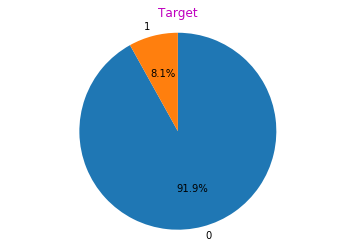

In [9]:
num_array = df["TARGET"].value_counts().tolist()
plt.pie(num_array, labels=["0", "1"], autopct="%1.1f%%", counterclock=False, startangle=90)
# 楕円ではなく円として表示
plt.axis("equal")
plt.title("Target",color="m")
plt.show()

【考察】返済ができている人が9割ほどである

## 【問題3】課題設定
データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。

【回答】
- 欠損値の多い特徴量は削除の方向で
- 前回の住宅価格予想では、相関関係を見ることで相関の高い特徴量が把握できたので、試してみたい
- 返済できなかった人と、返済できた人の特徴量ごとの割合が見たい
- 年齢を年表示にして、返済した人としなかった人でグラフにしてみたい

## 【問題4】データ探索
問題3で設定した課題・疑問を解決するためにデータ探索を進めます。探索で使用する表やグラフを、考察と共に 15個以上 作成してください。<br>
探索過程で新しい疑問点が生まれた場合は、問題3の回答に加えていってください。

### 相関関係を見る
目的変数TARGETとの相関関係の高い物を見てみる

In [10]:
coef = df.corr()
coef["TARGET"].sort_values()

EXT_SOURCE_3                  -0.178919
EXT_SOURCE_2                  -0.160472
EXT_SOURCE_1                  -0.155317
DAYS_EMPLOYED                 -0.044932
FLOORSMAX_AVG                 -0.044003
FLOORSMAX_MEDI                -0.043768
FLOORSMAX_MODE                -0.043226
AMT_GOODS_PRICE               -0.039645
REGION_POPULATION_RELATIVE    -0.037227
ELEVATORS_AVG                 -0.034199
ELEVATORS_MEDI                -0.033863
FLOORSMIN_AVG                 -0.033614
FLOORSMIN_MEDI                -0.033394
LIVINGAREA_AVG                -0.032997
LIVINGAREA_MEDI               -0.032739
FLOORSMIN_MODE                -0.032698
TOTALAREA_MODE                -0.032596
ELEVATORS_MODE                -0.032131
LIVINGAREA_MODE               -0.030685
AMT_CREDIT                    -0.030369
APARTMENTS_AVG                -0.029498
APARTMENTS_MEDI               -0.029184
FLAG_DOCUMENT_6               -0.028602
APARTMENTS_MODE               -0.027284
LIVINGAPARTMENTS_AVG          -0.025031


### 相関の高かった特徴量の意味を調べる
DAYS_REGISTRATION              0.041975 アプリケーションがクライアントの登録を変更する前に何日<br>
FLAG_DOCUMENT_3                0.044346   クライアントはドキュメント3を提供しましたか<br>
REG_CITY_NOT_LIVE_CITY         0.044395  クライアントの本籍地が連絡先住所と一致しない場合にフラグを立てます（1 =異なる、0 =同じ、都市レベル）<br>
FLAG_EMP_PHONE                 0.045982  クライアントは職場の電話を提供しましたか（1 =はい、0 =いいえ）<br>
REG_CITY_NOT_WORK_CITY         0.050994 クライアントの住所が勤務先住所と一致しない場合にフラグを立てます（1 =異なる、0 =同じ、都市レベル）<br>
DAYS_ID_PUBLISH                0.051457  申請の何日前に、クライアントはローンを申請した身分証明書を変更しましたか<br>
DAYS_LAST_PHONE_CHANGE         0.055218  アプリケーションが電話を変更する前に何日<br>
REGION_RATING_CLIENT           0.058899  クライアントが住んでいる地域の私たちの評価（1,2,3）<br>
REGION_RATING_CLIENT_W_CITY    0.060893  都市を考慮したクライアントの居住地域の評価（1,2,3）<br>
DAYS_BIRTH                     0.078239  申請時のクライアントの年齢（日数）<br>

### 1番相関の高かった年齢について見てみる

In [11]:
df["DAYS_BIRTH"]

0         -9461
1        -16765
2        -19046
3        -19005
4        -19932
5        -16941
6        -13778
7        -18850
8        -20099
9        -14469
10       -10197
11       -20417
12       -13439
13       -14086
14       -14583
15        -8728
16       -12931
17        -9776
18       -17718
19       -11348
20       -18252
21       -14815
22       -11146
23       -24827
24       -11286
25       -19334
26       -18724
27       -15948
28        -9994
29       -10341
          ...  
307481   -20644
307482   -14106
307483   -24911
307484   -12847
307485   -11973
307486   -16010
307487   -23125
307488   -10092
307489   -16471
307490    -9874
307491   -10976
307492   -20965
307493   -17533
307494   -14958
307495   -20922
307496   -17345
307497   -16679
307498   -19102
307499   -16988
307500   -20390
307501   -12961
307502   -16063
307503   -11870
307504   -16705
307505   -24384
307506    -9327
307507   -20775
307508   -14966
307509   -11961
307510   -16856
Name: DAYS_BIRTH, Length

### 【考察】 年齢は日数のデータなので、わかりづらい、値もマイナスである　年表示にして、返済した人としなかった人でグラフにしてみたい

### 全特徴量でヒートマップ を出してみる

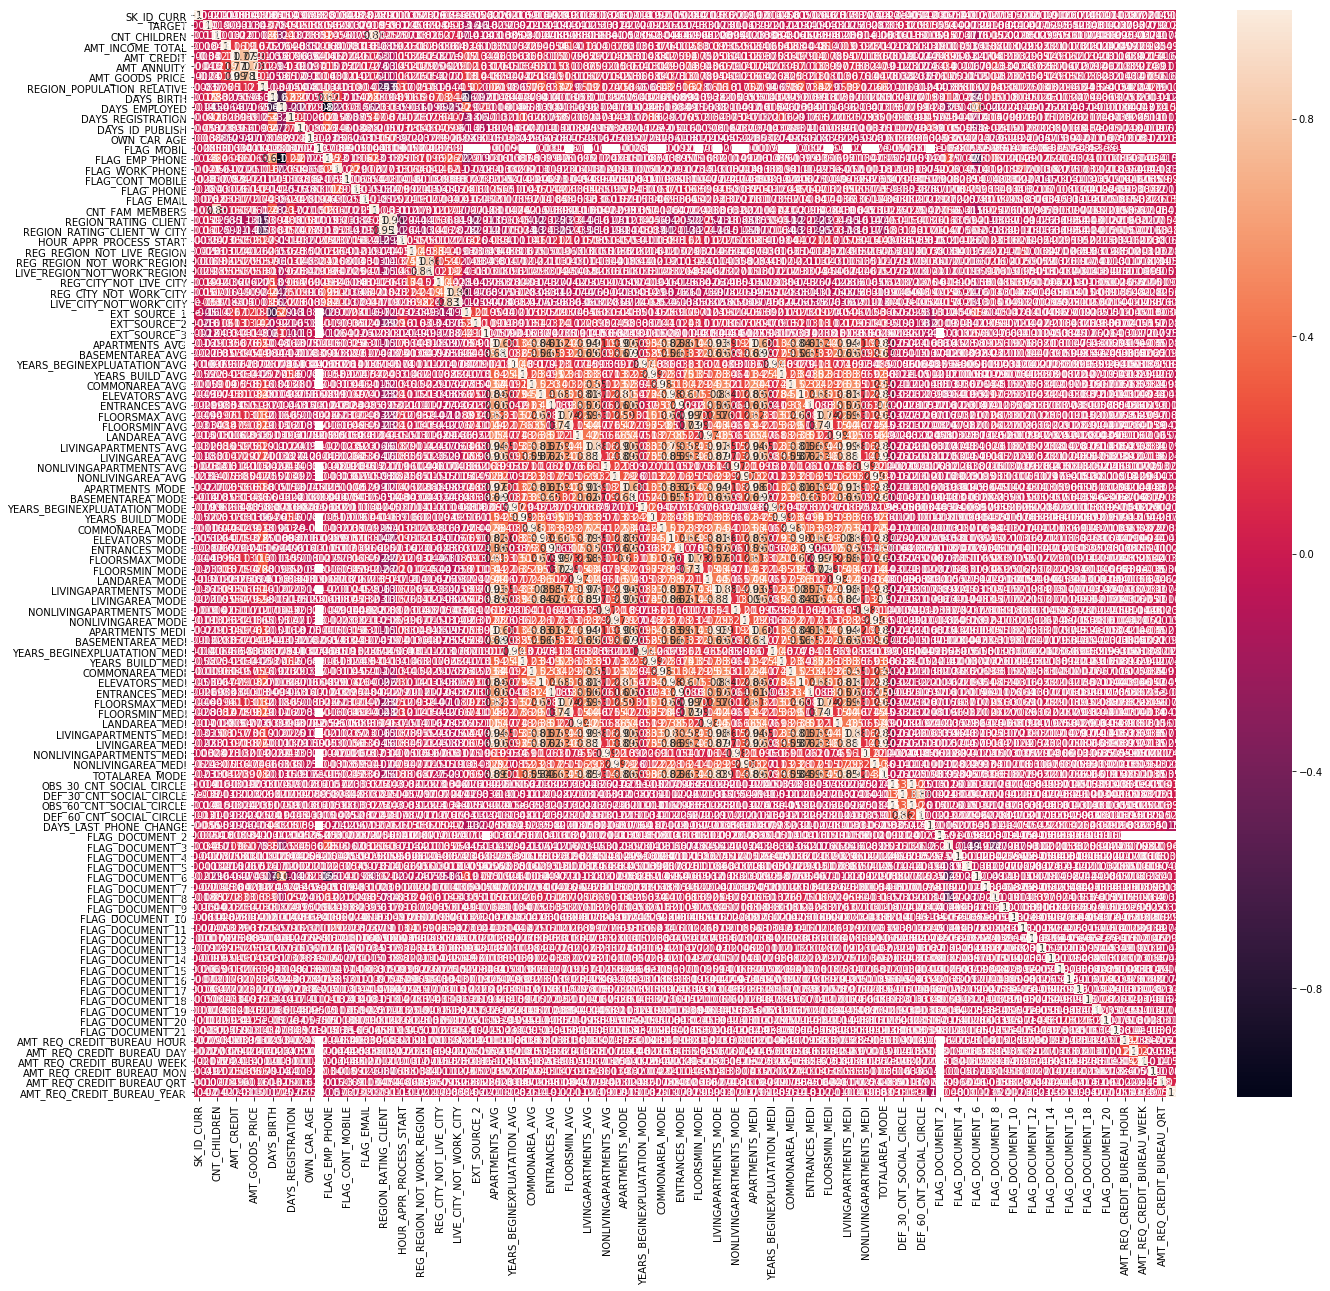

In [12]:
plt.figure(figsize=(22,20))
sns.heatmap(df.corr(), annot=True)

### 相関の高かった数値同士の相関を見る

In [13]:
df_sel = df.loc[:,["TARGET","CODE_GENDER","AMT_CREDIT","AMT_ANNUITY", "NAME_INCOME_TYPE", 
                 "NAME_FAMILY_STATUS", "DAYS_BIRTH", "DAYS_EMPLOYED"]]

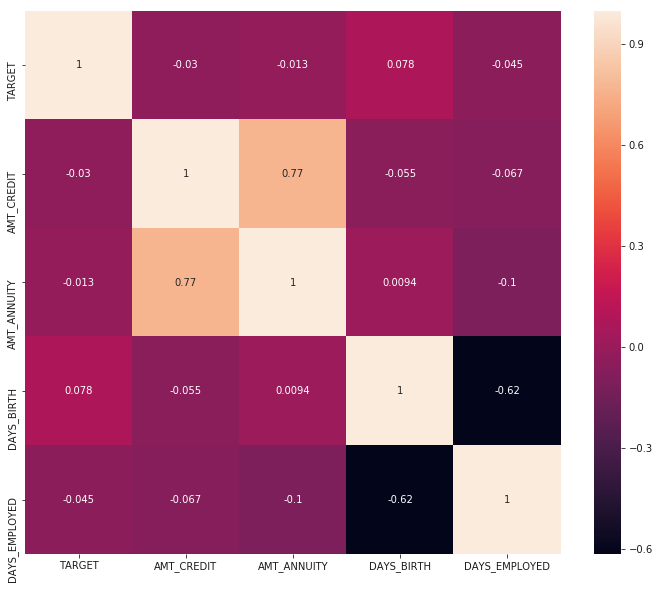

In [26]:
plt.figure(figsize=(12,10))
sns.heatmap(df_sel.corr(), annot=True)

### 【考察】相関をみてみたが、目的変数との相関は低く他の方法でアプローチした方が良さそう?

### ここからはKaggle notebookの投票が高かった下記のページを参考にEDAを行う
https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction

- 欠損値のパーセンテージを出しているが、ここでは削除していない
- カテゴリデータを持つ物で、2つのカテゴリのものは0,1でラベルエンコーディング、3つ以上のものはone-hotエンコーディングで置き換えている

In [30]:
# 年齢を年数表示にしてdescribe
(df['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [32]:
df['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

Text(0.5,0,'Days Employment')

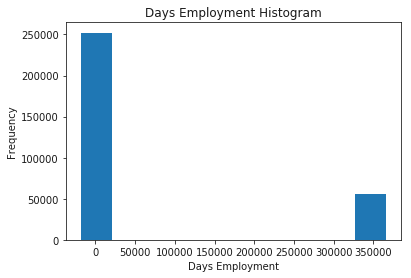

In [31]:
#雇用日数に異常値(勤続年数が1000年超え)が入っている
df['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram')
plt.xlabel('Days Employment')

In [34]:
anom = df[df['DAYS_EMPLOYED'] == 365243]
non_anom = df[df['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * df['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * df['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.07% of loans
The anomalies default on 8.07% of loans
There are 55374 anomalous days of employment


特徴量「DAYS_EMPLOYED」に55376個異常値が入っていた。ここでは異常値を欠損値NaNに置き換えていた

In [36]:
# 融資の時から遡った年齢なので、絶対値に変更
df['DAYS_BIRTH'] = abs(df['DAYS_BIRTH'])

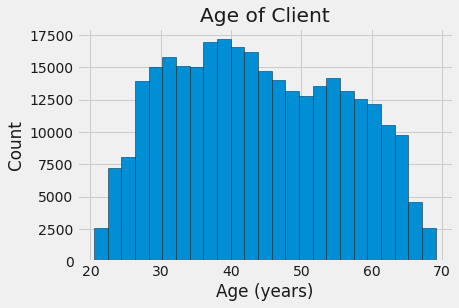

In [37]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(df['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


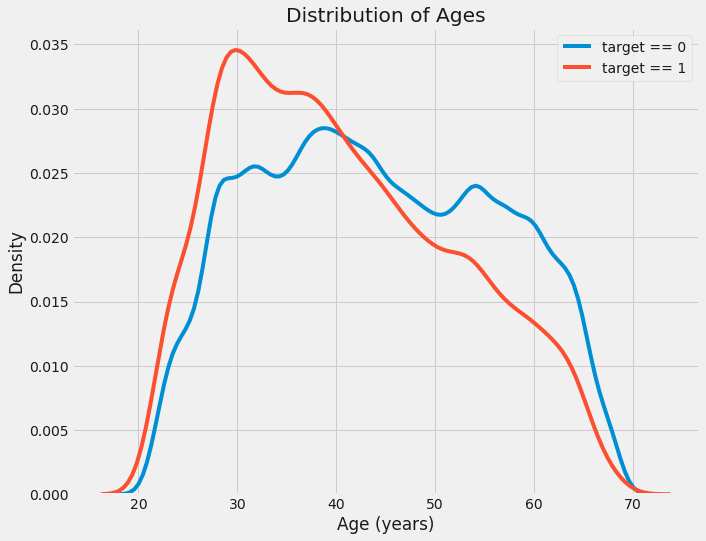

In [39]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[df['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[df['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

若い人ほど返済できない人が多かったことがわかる<br>
次に、年齢を5歳ごとに区切り、返済できなかった割合を見る

In [43]:
# Age information into a separate dataframe
age_data = df[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


TARGET  DAYS_BIRTH  YEARS_BIRTH  YEARS_BINNED
0       1        9461    25.920548  (25.0, 30.0]
1       0       16765    45.931507  (45.0, 50.0]
2       0       19046    52.180822  (50.0, 55.0]
3       0       19005    52.068493  (50.0, 55.0]
4       0       19932    54.608219  (50.0, 55.0]
5       0       16941    46.413699  (45.0, 50.0]
6       0       13778    37.747945  (35.0, 40.0]
7       0       18850    51.643836  (50.0, 55.0]
8       0       20099    55.065753  (55.0, 60.0]
9       0       14469    39.641096  (35.0, 40.0]

In [44]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

TARGET    DAYS_BIRTH  YEARS_BIRTH
YEARS_BINNED                                     
(20.0, 25.0]  0.123036   8532.795625    23.377522
(25.0, 30.0]  0.111436  10155.219250    27.822518
(30.0, 35.0]  0.102814  11854.848377    32.479037
(35.0, 40.0]  0.089414  13707.908253    37.555913
(40.0, 45.0]  0.078491  15497.661233    42.459346
(45.0, 50.0]  0.074171  17323.900441    47.462741
(50.0, 55.0]  0.066968  19196.494791    52.593136
(55.0, 60.0]  0.055314  20984.262742    57.491131
(60.0, 65.0]  0.052737  22780.547460    62.412459
(65.0, 70.0]  0.037270  24292.614340    66.555108

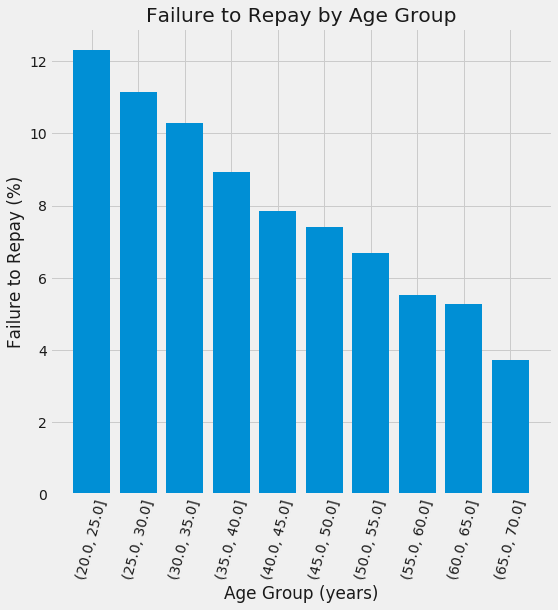

In [45]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

若い人ほど返済の可能性が低いことがわかった<br>
次に負の相関係数の高かったEXT_SOURCE_1、EXT_SOURCE_2、EXT_SOURCE_3を見ていくとある<br>
相関係数の数値があまり高くなくても、目的変数との相関が高い説明変数を調べていくことは良さそうである

In [46]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = df[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

TARGET  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  DAYS_BIRTH
TARGET        1.000000     -0.155317     -0.160472     -0.178919   -0.078239
EXT_SOURCE_1 -0.155317      1.000000      0.213982      0.186846    0.600610
EXT_SOURCE_2 -0.160472      0.213982      1.000000      0.109167    0.091996
EXT_SOURCE_3 -0.178919      0.186846      0.109167      1.000000    0.205478
DAYS_BIRTH   -0.078239      0.600610      0.091996      0.205478    1.000000

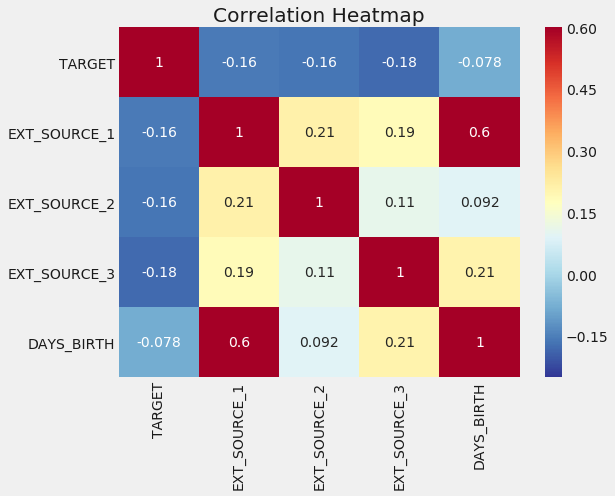

In [47]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

In [48]:
df[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']].head(10)

TARGET  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  DAYS_BIRTH
0       1      0.083037      0.262949      0.139376        9461
1       0      0.311267      0.622246           NaN       16765
2       0           NaN      0.555912      0.729567       19046
3       0           NaN      0.650442           NaN       19005
4       0           NaN      0.322738           NaN       19932
5       0           NaN      0.354225      0.621226       16941
6       0      0.774761      0.724000      0.492060       13778
7       0           NaN      0.714279      0.540654       18850
8       0      0.587334      0.205747      0.751724       20099
9       0           NaN      0.746644           NaN       14469

3 つの EXT_SOURCE の特徴はすべてターゲットと負の相関があり、EXT_SOURCE の値が高くなると、クライアントはローンを返済する可能性が高くなることを示しています。また、DAYS_BIRTHはEXT_SOURCE_1と正の相関があり、このスコアの要因の一つが顧客の年齢であることを示しています。<br>

TARGETが1（返済できない）に近くなると、特徴量の数値も増えるのが正の相関
ここでは負の相関なので、特徴量が増える（スコアが高くなる）と返済できる可能性が高くなる


/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


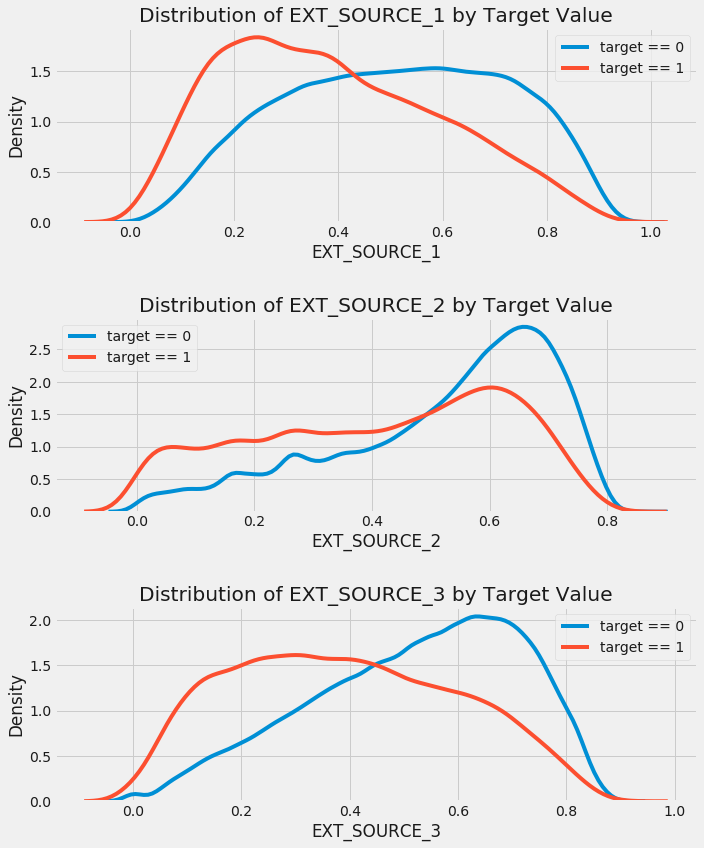

In [50]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(df.loc[df['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(df.loc[df['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

EXT_SOURCE_3は、ターゲットの値の間の最大の差を表示します。この特徴が、申請者がローンを返済する可能性と何らかの関係を持っていることがはっきりとわかります。

/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/seaborn/axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


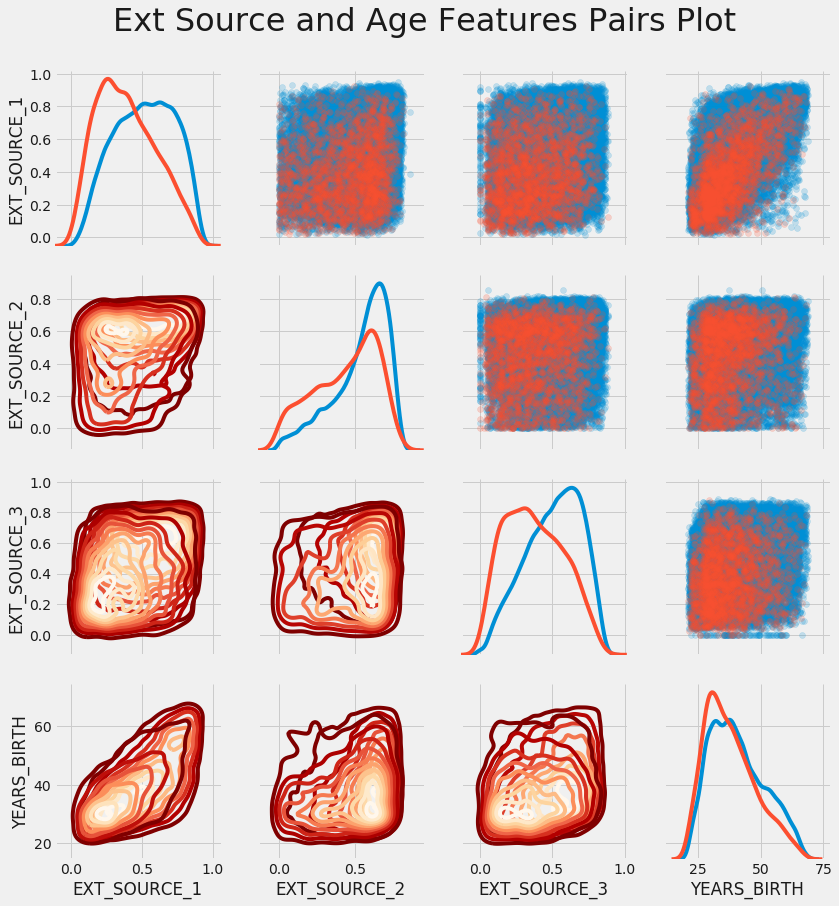

In [51]:
# Copy the data for plotting
plot_data = ext_data.drop(columns = ['DAYS_BIRTH']).copy()

# Add in the age of the client in years
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# Drop na values and limit to first 100000 rows
plot_data = plot_data.dropna().loc[:100000, :]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'TARGET', 
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05);

最後の探索的プロットとして、EXT_SOURCE変数とDAYS_BIRTH変数のペア・プロットを作成できます。ペア・プロットは、複数の変数のペア間の関係や、単一の変数の分布を見ることができるので、優れた探索ツールです。ここでは、seaborn可視化ライブラリとPairGrid関数を使って、上の三角形に散布図、対角線にヒストグラム、下の三角形に2Dカーネル密度プロットと相関係数を持つPairs Plotを作成しています。<br>
このプロットでは、赤は返済されなかったローン、青は返済されたローンを示しています。データ内の異なる関係を見ることができます。EXT_SOURCE_1とDAYS_BIRTH（または同等に YEARS_BIRTH）の間には、中程度の正の線形関係があるように見え、この特徴が顧客の年齢を考慮している可能性があることを示しています。

次に下記のnotebookを参考にデータを見ていく<br>
https://www.kaggle.com/gpreda/home-credit-default-risk-extensive-eda

In [52]:
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = df[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = df[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

In [53]:
def plot_distribution(var):
    
    i = 0
    t1 = df.loc[application_train['TARGET'] != 0]
    t0 = df.loc[application_train['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(2,2,figsize=(12,12))

    for feature in var:
        i += 1
        plt.subplot(2,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

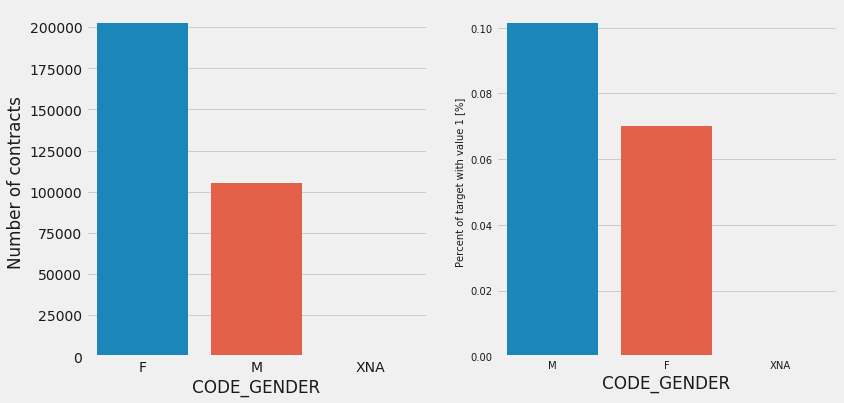

In [54]:
plot_stats('CODE_GENDER')

左が全サンプルのうちの男女の数、右が返済できなかった人の中での男女の比<br>
女性が男性の2倍ちかく利用しているが、男性の方が返済できていない割合が高い

年収と返済した人とできなかった人のグラフを出す

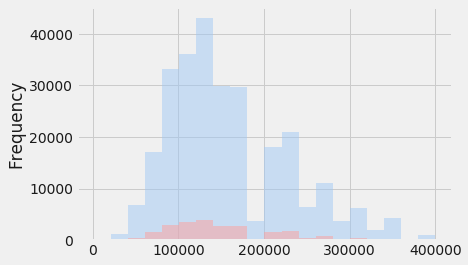

In [59]:
df["AMT_INCOME_TOTAL"][df["TARGET"]==0].plot.hist(bins=20, alpha = 0.5 ,color="b" ,range=(1000,400000))
df["AMT_INCOME_TOTAL"][df["TARGET"]==1].plot.hist(bins=20, alpha = 0.5, color="r",range=(1000,400000))

収入が多くても返済しない人がいるようだ。

/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


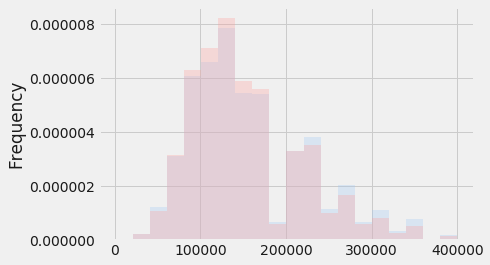

In [65]:
df["AMT_INCOME_TOTAL"][df["TARGET"]==0].plot.hist(bins=20, alpha = 0.3 ,color="b" ,normed=True,range=(1000,400000))
df["AMT_INCOME_TOTAL"][df["TARGET"]==1].plot.hist(bins=20, alpha = 0.3, color="r",normed=True,range=(1000,400000))

面積が1になるように正規化してみても、返済の有無との関係はなさそうである

相関係数も高めではあった、勤め先の電話番号を教えた人と、教えなかった人の返済の有無をみてみる<br>
FLAG_EMP_PHONE                 0.045982  クライアントは職場の電話を提供しましたか（1 =はい、0 =いいえ）

/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


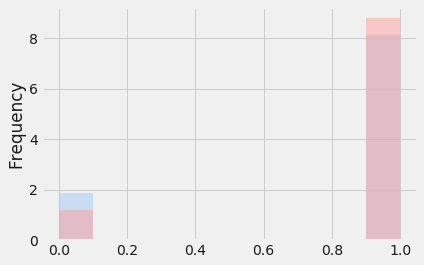

In [70]:
df["FLAG_EMP_PHONE"][df["TARGET"]==0].plot.hist(alpha = 0.5 ,color="b", normed=True)
df["FLAG_EMP_PHONE"][df["TARGET"]==1].plot.hist(alpha = 0.5, color="r", normed=True)

In [81]:
print("返済○、電話○",len(df[df["FLAG_EMP_PHONE"]==1][df["TARGET"]==0]))
print("返済○、電話×",len(df[df["FLAG_EMP_PHONE"]==0][df["TARGET"]==0]))
print("返済×、電話○",len(df[df["FLAG_EMP_PHONE"]==1][df["TARGET"]==1]))
print("返済×、電話×",len(df[df["FLAG_EMP_PHONE"]==0][df["TARGET"]==1]))

/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


返済○、電話○ 230291
返済○、電話× 52395


/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


返済×、電話○ 21834
返済×、電話× 2991


/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [82]:
52395/(230291+52395)

0.18534699277643746

In [83]:
2991/(21834 + 2991)

0.12048338368580061

割合をみても、職場の電話番号を教えたかどうかは、関係なさそうである

【まとめ】<br>
- 相関係数は全体的に高くなくても、関係のありそうな特徴量を見つけるのに参考にしても良いように思う<br>
- 正規化をすることで、データを見比べやすくなる<br>
- カテゴリデータを数値に置き換えてから検証するのも良い
- 欠損値の扱いは削除するだけではなく、one-hotエンコーディングもある
- 収入と返済の有無には関係があると思ったが、そうではなかった。きちんと検証して数値で判断することも重要である